In [7]:
import numpy as np
import matplotlib.pyplot as plt
import SpectralSynthesis as SS

In [8]:
H = np.array([1.0,0.5,0.0])
sigma = np.array([0.5,1.0,2.0])

In [9]:
N = 1000
Seed = 120
E = 2

In [10]:
X=[]
for h in H:
    for s in sigma:
        X.append(SS.fBm(N,E,h,s,Seed))

C:\Users\C1764397\Workshop\PhD\Scripts\SpectralSynthesis.py:55: RuntimeWarning: divide by zero encountered in power
  rad = np.where(k>0.0,k**(-(beta*0.5)),0.0)
C:\Users\C1764397\Workshop\PhD\Scripts\SpectralSynthesis.py:55: RuntimeWarning: divide by zero encountered in reciprocal
  rad = np.where(k>0.0,k**(-(beta*0.5)),0.0)


In [11]:
print(np.asarray(X).shape)

(9, 1000, 1000)


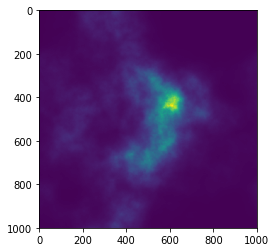

In [12]:
X = np.asarray(X)
plt.imshow(X[1,:,:])

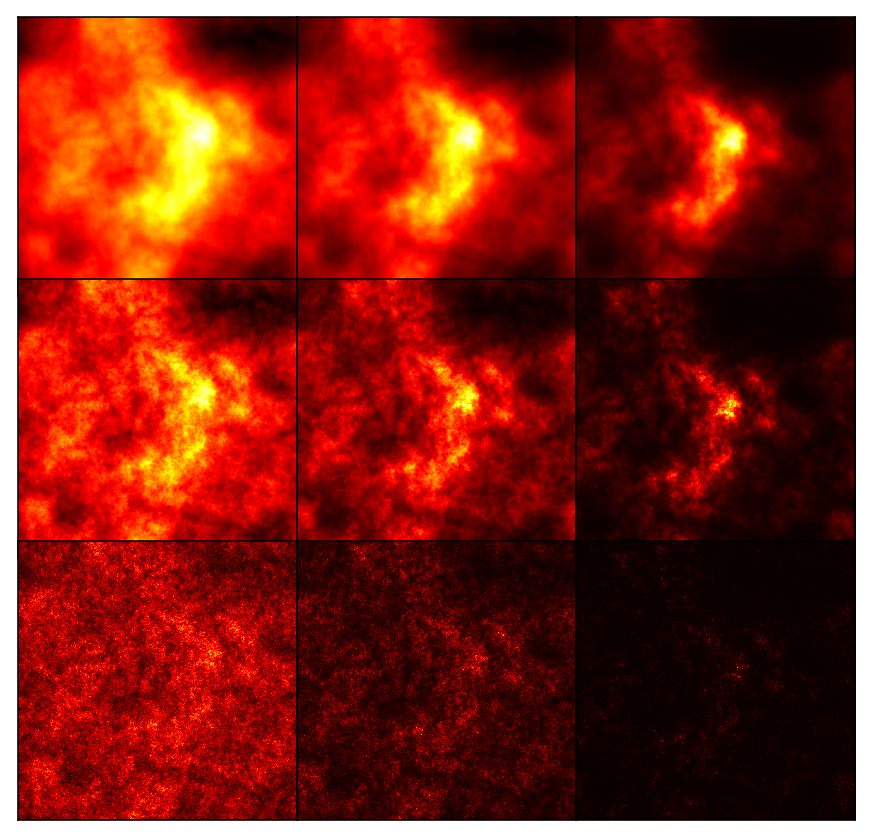

In [13]:
fig = plt.figure(figsize=(1080/144, 1080/144), dpi=144)
ax = [fig.add_subplot(3,3,i+1) for i in range(9)]

for i in range(9):
    a=ax[i]
    a.set_xticks([])
    a.set_yticks([])
    a.set_aspect('equal')
    a.imshow(X[i,:,:]**0.33,cmap="hot")
    
fig.subplots_adjust(wspace=0, hspace=-0.1)
plt.show()